### Import libraries 

In [1]:
#per creare rete
import pandas as pd
from rich import print
import networkx as nx
import networkx.algorithms as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.utils import np_random_state

#per la task
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph
from cdlib import algorithms, ensemble, evaluation, viz, NodeClustering

#altre
import seaborn as sns
import numpy as np
import math
import warnings
from collections import Counter
import numpy as np
warnings.filterwarnings('ignore')

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'karateclub', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [2]:
G=nx.read_gexf('final_net.gexf', node_type=int)
df_nodes=pd.read_csv('df_final.csv')
df_nodes['user_id']=df_nodes['user_id'].map(int)
df_nodes=df_nodes.set_index('user_id')
df_nodes['location']=df_nodes['location'].fillna('no loc')
df_nodes.head()

tweet_id          retweet_id  \
user_id                                            
290883   1502663077191426051          2956836471   
298073   1503178785746685954  889765401822973952   
611093   1501988978345627654            56698771   
699793   1502982769219371008           154830217   
756049   1502704662138568705          1255561430   

                                                   hashtag  \
user_id                                                      
290883      {'johnsonout47', 'nhsbadbill', 'slavaukraini'}   
298073                                    {'slavaukraini'}   
611093   {'ukraine', 'standwithukraine', 'odesa', 'slav...   
699793                {'slavaukraini', 'ukrainerussiawar'}   
756049                         {'slavaukraini', 'ukraine'}   

                        location  verified     cat  
user_id                                             
290883            European Union     False     pax  
298073                    no loc     False  proukr  
611093                  istanbul     False     pax  
699793   Pale Blue Dot/127.0.0.1     False     pax  
756049                    France     False  proukr

In [3]:
def divide_geo(geo):
    if ',' in geo:
        loc=geo.split(',')
        return loc[len(loc)-1]
    else:
        return geo
df_nodes['location']=df_nodes['location'].map(divide_geo)

In [4]:
df_nodes['location'].value_counts().sum()

32382

In [5]:
G.number_of_edges()

11968

In [6]:
G.number_of_nodes()

10184

# Community discovery algorithms

# Label Propagation

In [8]:
label_prop = algorithms.label_propagation(G)
label_prop.method_name

'Label Propagation'

In [9]:
label_prop_com=label_prop.communities
communities=[]

for i, c in enumerate(label_prop_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'cat'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus,loc
    communities.append(cat_value)
communities

[{0: ({'pax': 393},
   {'proukr': 1346},
   {'nocare': 123},
   {'prorus': 73},
   {'loc': {'',
     '  Maryland USA',
     ' #Toronto ',
     ' AB',
     ' AL',
     ' AR',
     ' AZ',
     ' Alabama',
     ' Alberta',
     ' Argentina',
     ' Arizona',
     ' Arkansas',
     ' Australia',
     ' B.C. Canada',
     ' Belgium',
     ' Bloomington.',
     ' Blue Ridge Mtns',
     ' Brasil',
     ' British Columbia',
     ' CA',
     ' CA ☀️🌴',
     ' CANADA',
     ' CO',
     ' California',
     ' Canada',
     ' Canada ',
     ' Cape Breton    ',
     ' Covfefe',
     ' DC',
     ' DC USA 🇺🇸',
     ' DE',
     ' Delaware',
     ' Deutschla',
     ' Deutschland',
     ' England',
     ' England ',
     ' Europe',
     ' FL',
     ' Finland',
     ' Fl',
     ' Fla',
     ' Florida',
     ' Florida. USA.',
     ' GA',
     ' GA Fulton County',
     ' GA USA',
     ' Germany',
     ' HI',
     ' Houston',
     ' IA',
     ' ID',
     ' IL',
     ' IN',
     ' Ia',
     ' Iceland',
     '

In [10]:
print(len(label_prop.communities))

360

In [11]:
label_prop.overlap

False

In [12]:
label_prop.node_coverage

1.0

In [13]:
#label_prop.to_json()

# Louvain

In [ ]:
res=ensemble.Parameter(name="resolution", start=0.1, end=1, step=0.1)
rand=ensemble.BoolParameter(name="randomize")

coms_mod, scoring_mod = ensemble.grid_search(graph=G, method=algorithms.louvain,
                                                     parameters=[res, rand],
                                                     quality_score=evaluation.newman_girvan_modularity,
                                                     aggregate=max)

print("Configuration: %s \nScoring: %s" %(coms_mod.method_parameters, scoring_mod))

In [ ]:
#Leiden algorithm is an improvement of the Louvain algorithm
louvain = algorithms.louvain(G, weight= 'weight', resolution= 0.9, randomize=True)
louvain.method_name 

In [ ]:
#Clustering parameters
louvain.method_parameters 

In [ ]:
louvain_com=louvain.communities
communities=[]

for i, c in enumerate(louvain_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'cat'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus#loc
    communities.append(cat_value)
communities

In [ ]:

len(louvain.communities)

In [ ]:
#veirfy if the clustering overlap or not
louvain.overlap 

In [ ]:
#percentage of node covered by the clustering
louvain.node_coverage 

In [22]:
#json representation of the results
#louvain.to_json()

# K Clique

In [ ]:
res=ensemble.Parameter(name="k", start=0.1, end=1, step=0.1)
rand=ensemble.BoolParameter(name="randomize")

coms_mod, scoring_mod = ensemble.grid_search(graph=G, method=algorithms.louvain,
                                                     parameters=[res, rand],
                                                     quality_score=evaluation.newman_girvan_modularity,
                                                     aggregate=max)

print("Configuration: %s \nScoring: %s" %(coms_mod.method_parameters, scoring_mod))

In [23]:
k_clique=algorithms.kclique(G, k=3)

In [24]:
k_clique_com=k_clique.communities
communities=[]

for i, c in enumerate(k_clique_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'cat'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus #loc
    communities.append(cat_value)
communities

[{0: ({'pax': 66}, {'proukr': 183}, {'nocare': 16}, {'prorus': 11})},
 {1: ({'pax': 25}, {'proukr': 86}, {'nocare': 7}, {'prorus': 7})},
 {2: ({'pax': 14}, {'proukr': 26}, {'nocare': 2}, {'prorus': 3})},
 {3: ({'pax': 7}, {'proukr': 24}, {'nocare': 4}, {'prorus': 1})},
 {4: ({'pax': 4}, {'proukr': 9}, {'nocare': 2}, {'prorus': 0})},
 {5: ({'pax': 4}, {'proukr': 7}, {'nocare': 1}, {'prorus': 1})},
 {6: ({'pax': 1}, {'proukr': 6}, {'nocare': 1}, {'prorus': 0})},
 {7: ({'pax': 2}, {'proukr': 5}, {'nocare': 0}, {'prorus': 0})},
 {8: ({'pax': 2}, {'proukr': 2}, {'nocare': 1}, {'prorus': 0})},
 {9: ({'pax': 1}, {'proukr': 4}, {'nocare': 0}, {'prorus': 0})},
 {10: ({'pax': 0}, {'proukr': 3}, {'nocare': 1}, {'prorus': 1})},
 {11: ({'pax': 1}, {'proukr': 1}, {'nocare': 0}, {'prorus': 2})},
 {12: ({'pax': 3}, {'proukr': 0}, {'nocare': 0}, {'prorus': 1})},
 {13: ({'pax': 1}, {'proukr': 3}, {'nocare': 0}, {'prorus': 0})},
 {14: ({'pax': 2}, {'proukr': 0}, {'nocare': 0}, {'prorus': 1})},
 {15: ({'p

In [25]:
len(k_clique.communities)

39

In [26]:
k_clique.overlap

True

In [27]:
k_clique.node_coverage

0.058228593872741555

## Leiden

In [7]:
#leiden=algorithms.leiden(G, weights='weight')
leiden=algorithms.leiden(G)

In [15]:
leiden_com=leiden.communities
communities=[]

for i, c in enumerate(leiden_com):
    comm_node=[]
    node=[]
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'cat'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus #,loc
    communities.append(cat_value)
communities

[{0: ({'pax': 327}, {'proukr': 1150}, {'nocare': 108}, {'prorus': 56})},
 {1: ({'pax': 253}, {'proukr': 685}, {'nocare': 78}, {'prorus': 46})},
 {2: ({'pax': 145}, {'proukr': 454}, {'nocare': 47}, {'prorus': 27})},
 {3: ({'pax': 102}, {'proukr': 394}, {'nocare': 37}, {'prorus': 27})},
 {4: ({'pax': 118}, {'proukr': 379}, {'nocare': 23}, {'prorus': 14})},
 {5: ({'pax': 103}, {'proukr': 355}, {'nocare': 37}, {'prorus': 18})},
 {6: ({'pax': 64}, {'proukr': 234}, {'nocare': 24}, {'prorus': 9})},
 {7: ({'pax': 60}, {'proukr': 181}, {'nocare': 16}, {'prorus': 9})},
 {8: ({'pax': 54}, {'proukr': 161}, {'nocare': 22}, {'prorus': 16})},
 {9: ({'pax': 56}, {'proukr': 139}, {'nocare': 12}, {'prorus': 8})},
 {10: ({'pax': 52}, {'proukr': 136}, {'nocare': 12}, {'prorus': 7})},
 {11: ({'pax': 41}, {'proukr': 130}, {'nocare': 18}, {'prorus': 7})},
 {12: ({'pax': 40}, {'proukr': 129}, {'nocare': 15}, {'prorus': 9})},
 {13: ({'pax': 41}, {'proukr': 127}, {'nocare': 11}, {'prorus': 11})},
 {14: ({'pax':

In [17]:
node

[3367976260, 1302967232239202304, 1350541783890096132, 1368799567190237188]

In [27]:
leiden.overlap

False

In [34]:
leiden.node_coverage

1.0

In [20]:
comm_leiden=dict()
for i, c in enumerate(leiden_com):
    comm_leiden[i]=c


In [22]:
comm_leiden[0]

[4615341,
 11486222,
 14410543,
 14491785,
 14542602,
 14719297,
 15074415,
 15265442,
 15372674,
 15391466,
 15464687,
 15521789,
 15651835,
 15652824,
 15713194,
 15794264,
 15964748,
 16136445,
 16165381,
 16311161,
 16316179,
 16484910,
 16654294,
 16702010,
 16715269,
 16719914,
 16867563,
 16905638,
 16938726,
 16967028,
 17001893,
 17057683,
 17142825,
 17204460,
 17238730,
 17240376,
 17418011,
 17452552,
 17471611,
 17612969,
 17822006,
 18002731,
 18029310,
 18033503,
 18037002,
 18060010,
 18481086,
 18495916,
 18514141,
 18600732,
 18685355,
 18868110,
 18954472,
 19121806,
 19170412,
 19654085,
 20061929,
 20311009,
 20488455,
 20509794,
 20565828,
 20728264,
 20862590,
 20895558,
 20964739,
 21430872,
 21458404,
 21474305,
 21483883,
 21926764,
 22019015,
 22274126,
 22365812,
 22439048,
 22531716,
 22648912,
 22659416,
 22707692,
 22818501,
 22846618,
 22885743,
 22886404,
 22996614,
 23102114,
 23763190,
 23871907,
 23878825,
 23996107,
 24237749,
 24291857,
 24867383,


In [ ]:
G=nx.

# Angel

In [83]:
angel= algorithms.angel(G, min_community_size=3, threshold=0.3) #demon(G, min_com_size=3, epsilon =0.3)
#angel=algorithms.eigenvector(G)

In [84]:
angel.method_parameters

{'threshold': 0.3, 'min_community_size': 3}

In [72]:
angel_com=angel.communities
communities=[]

for i, c in enumerate(angel_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'cat'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus #,loc
    communities.append(cat_value)
communities

[{0: ({'pax': 101}, {'proukr': 292}, {'nocare': 28}, {'prorus': 20})},
 {1: ({'pax': 14}, {'proukr': 26}, {'nocare': 2}, {'prorus': 3})},
 {2: ({'pax': 4}, {'proukr': 9}, {'nocare': 2}, {'prorus': 0})},
 {3: ({'pax': 1}, {'proukr': 6}, {'nocare': 1}, {'prorus': 0})},
 {4: ({'pax': 2}, {'proukr': 5}, {'nocare': 0}, {'prorus': 0})},
 {5: ({'pax': 3}, {'proukr': 0}, {'nocare': 0}, {'prorus': 1})},
 {6: ({'pax': 1}, {'proukr': 3}, {'nocare': 0}, {'prorus': 0})}]

In [73]:
angel.overlap

True

In [74]:
angel.node_coverage

0.05145326001571092

In [75]:
#angel.to_json()

# Community Visualization

In [64]:
pos = nx.spring_layout(G)

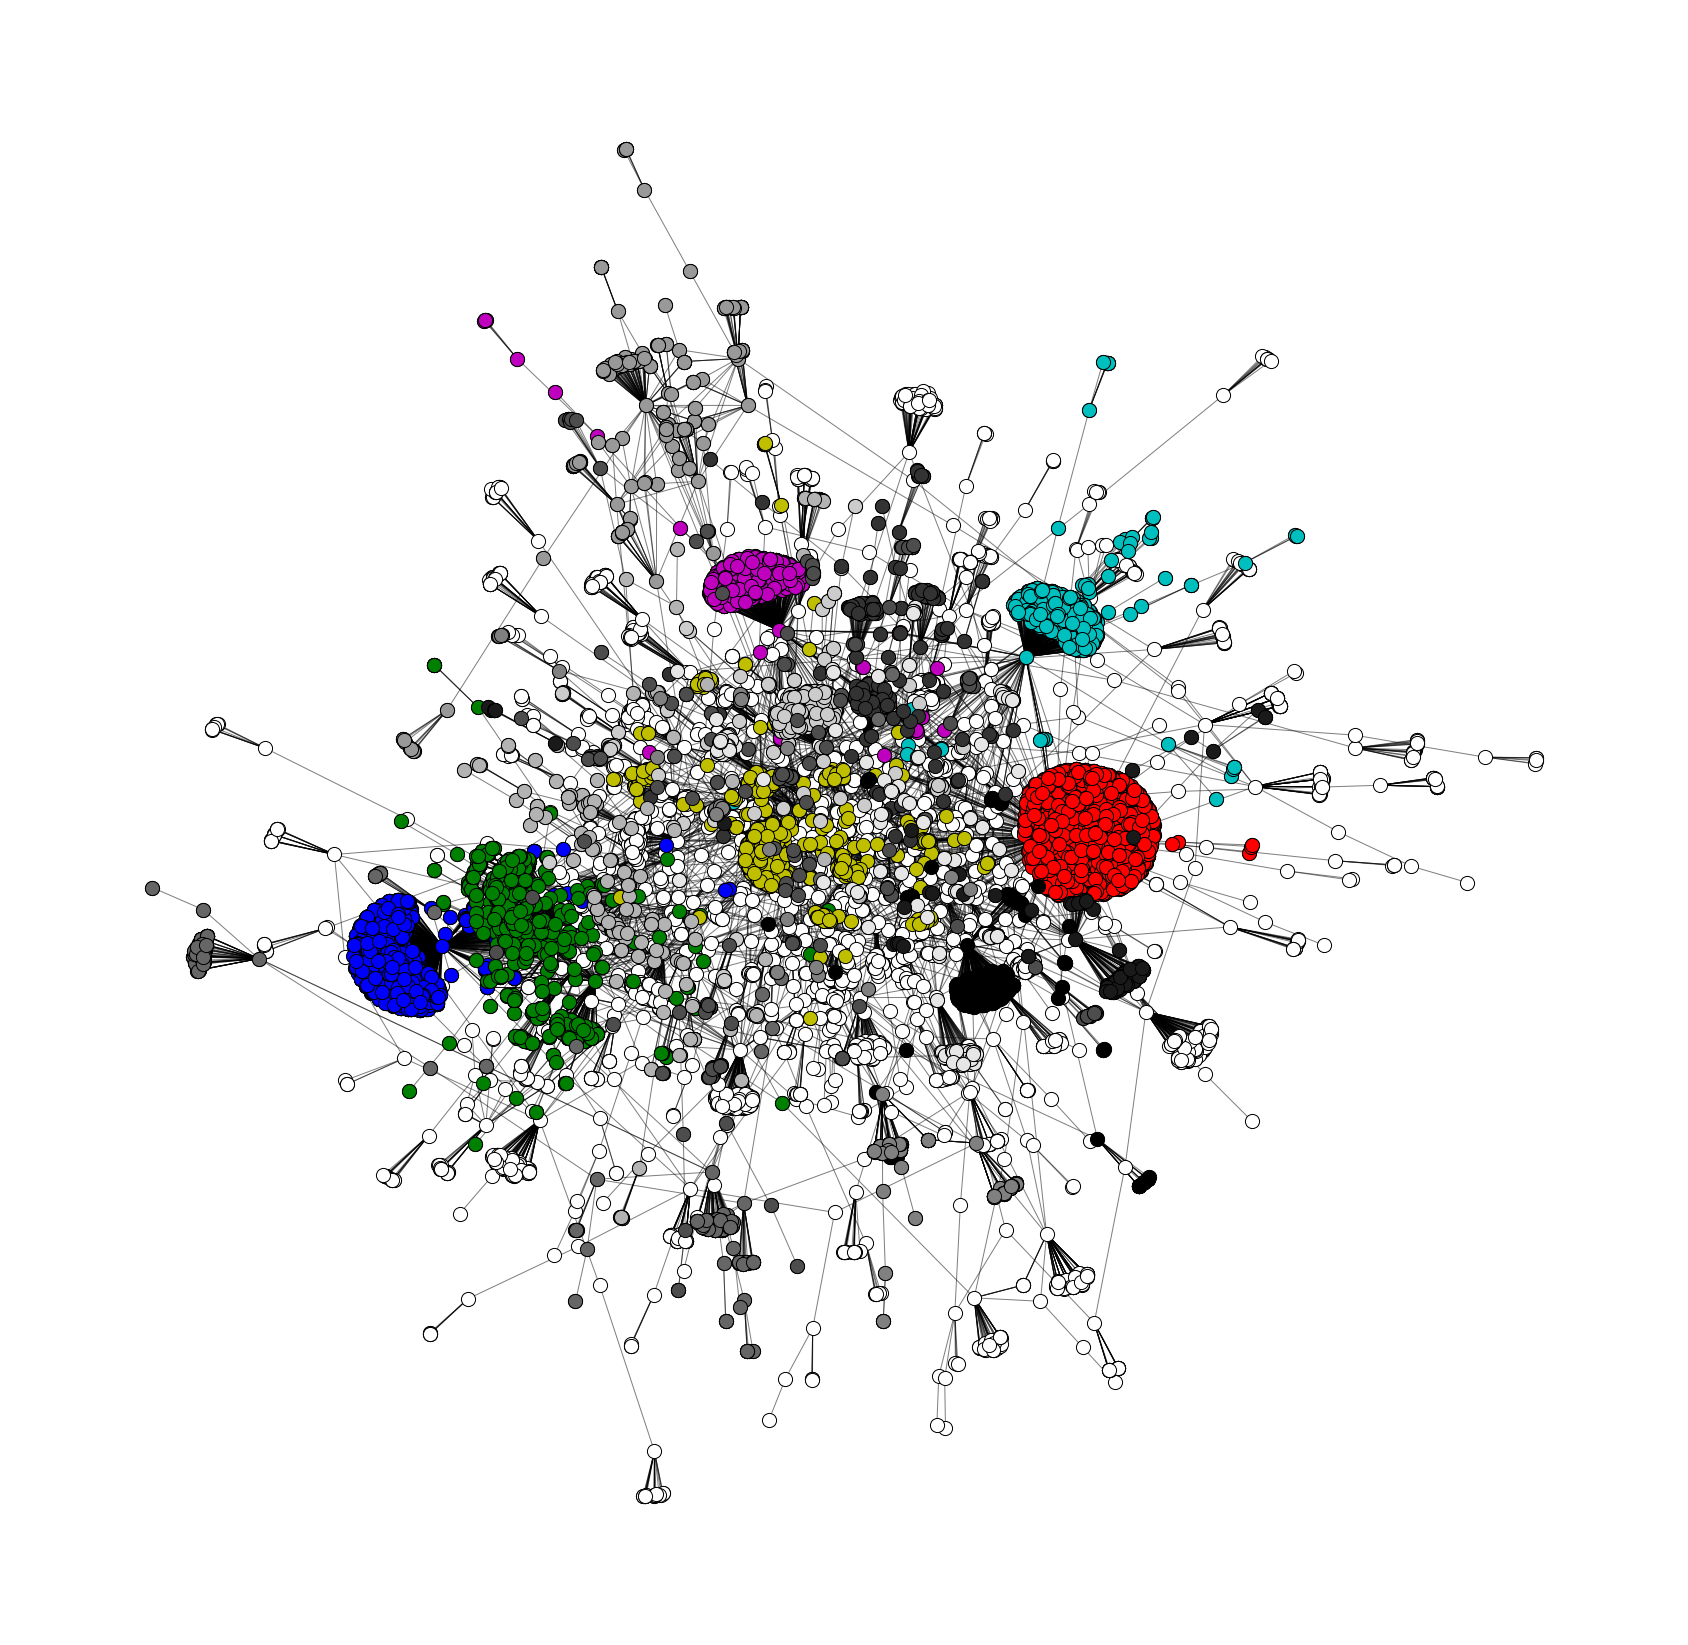

In [65]:
viz.plot_network_clusters(G, leiden, pos, figsize=(30, 30), plot_labels=False)

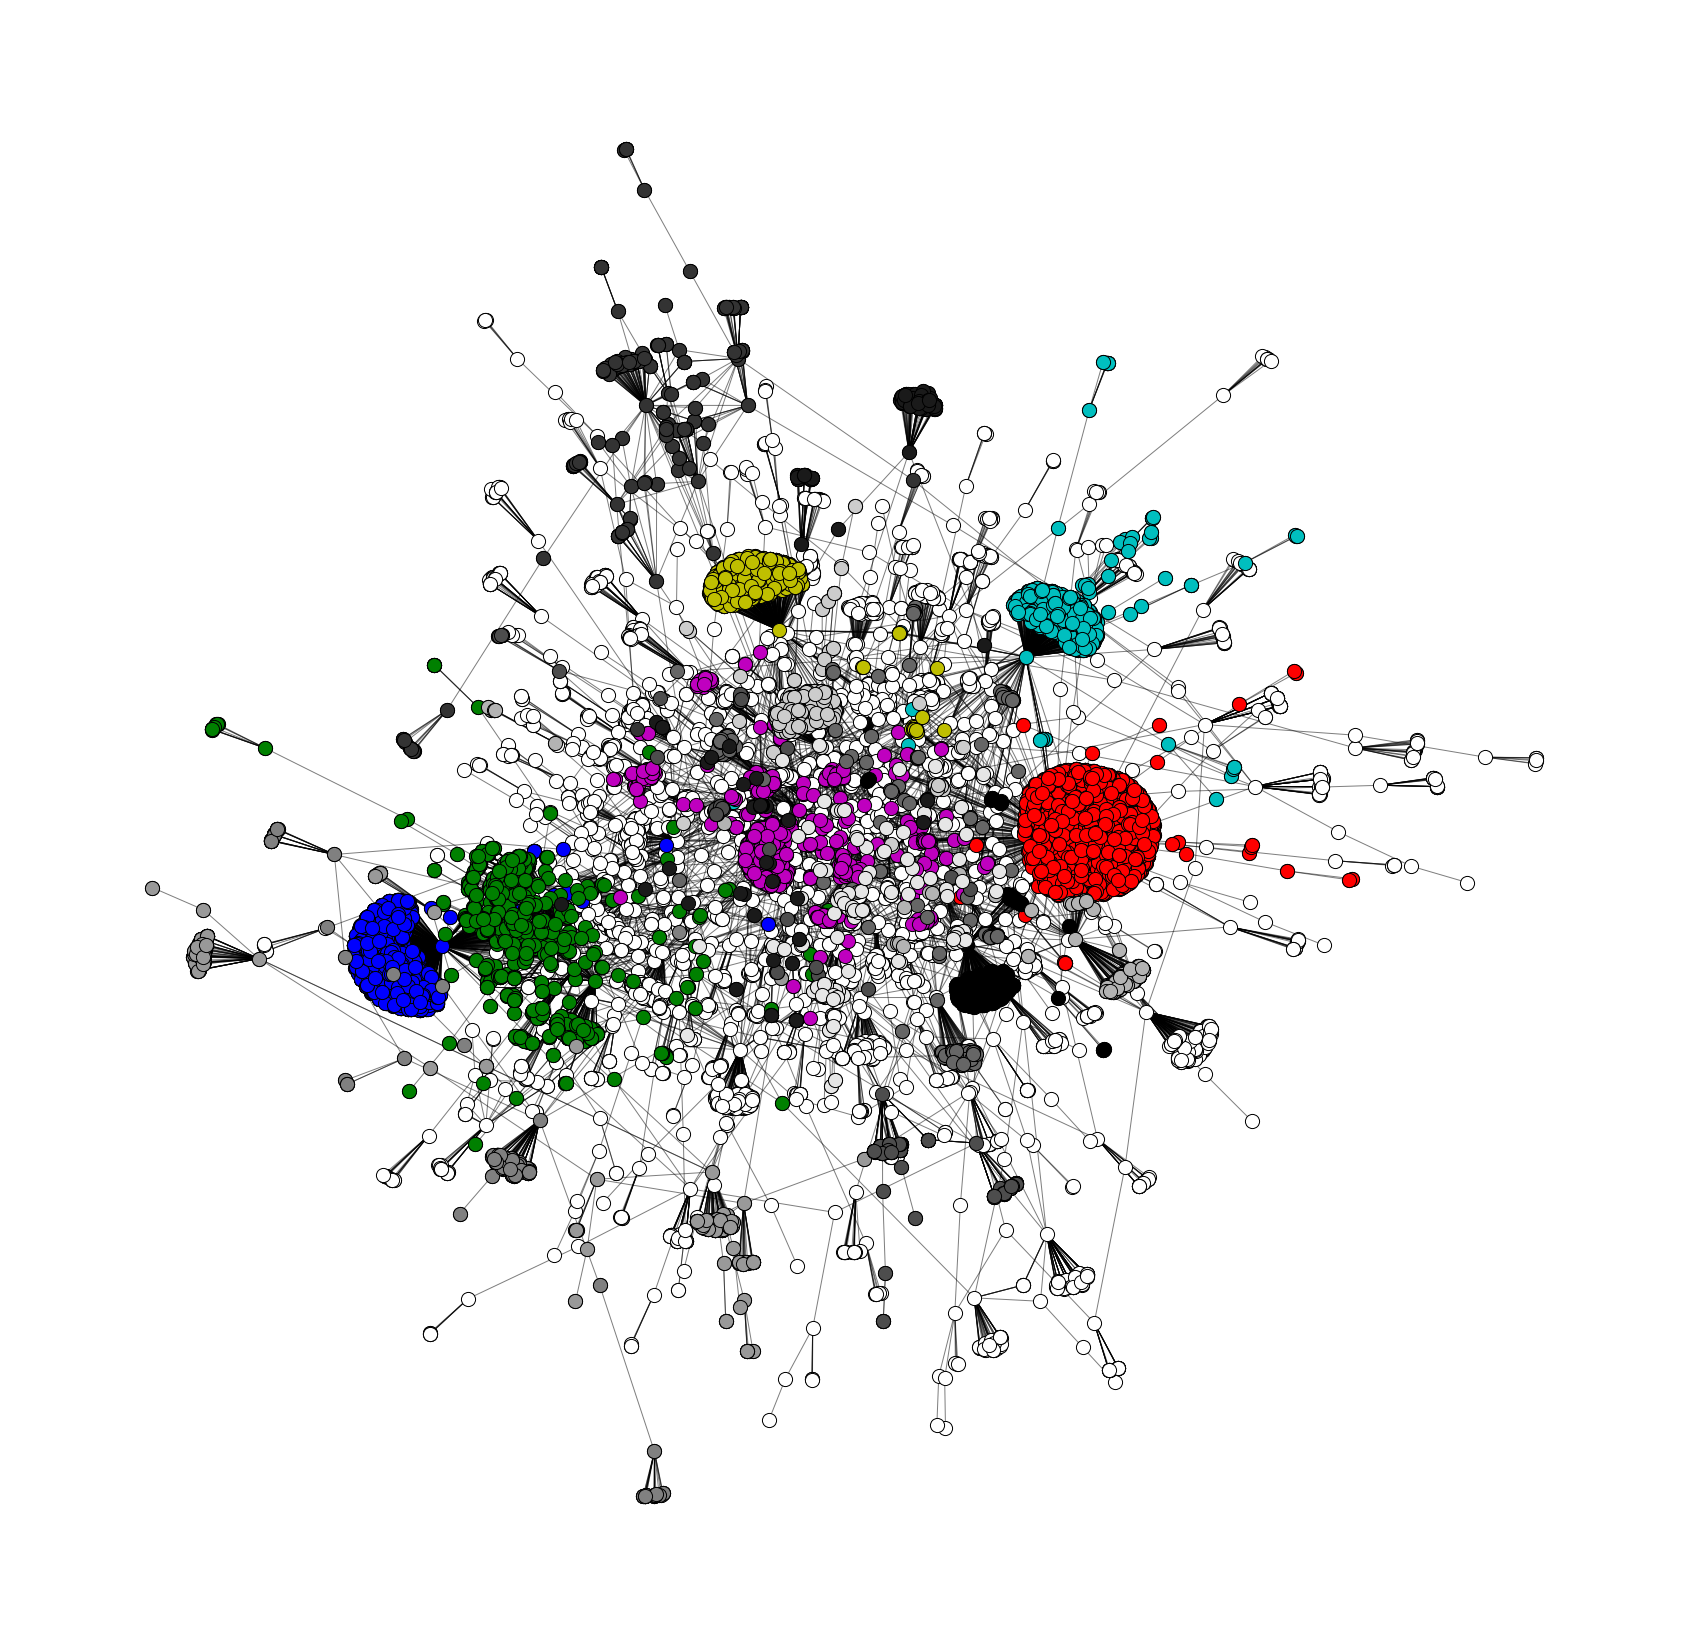

In [66]:
viz.plot_network_clusters(G, louvain,pos, figsize=(30, 30), plot_labels=False)

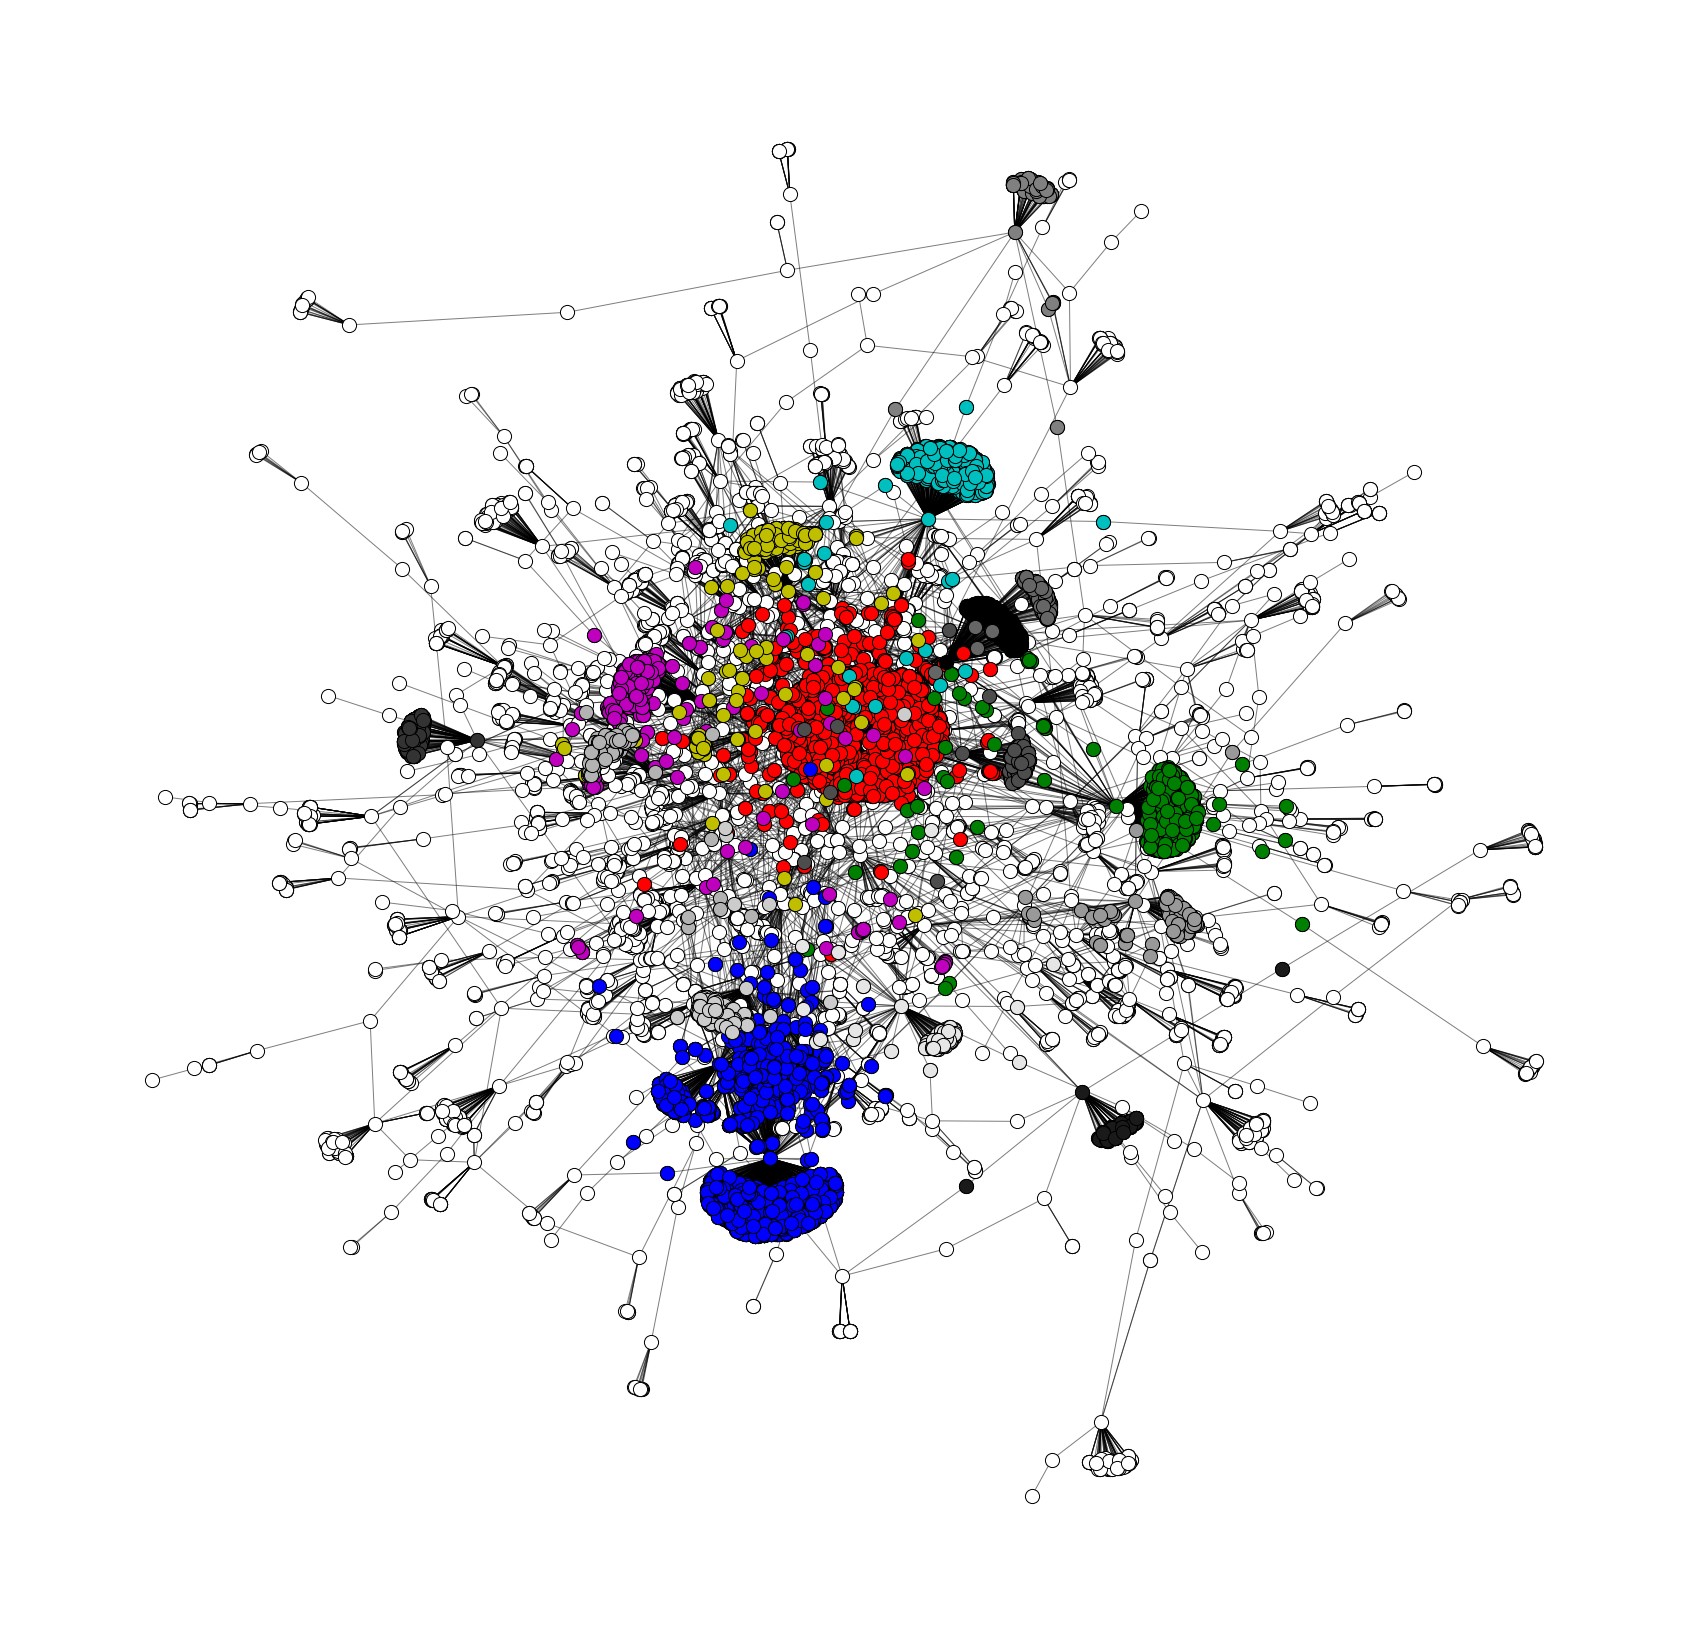

In [248]:
viz.plot_network_clusters(G, label_prop, pos, figsize=(30, 30), plot_labels=False)

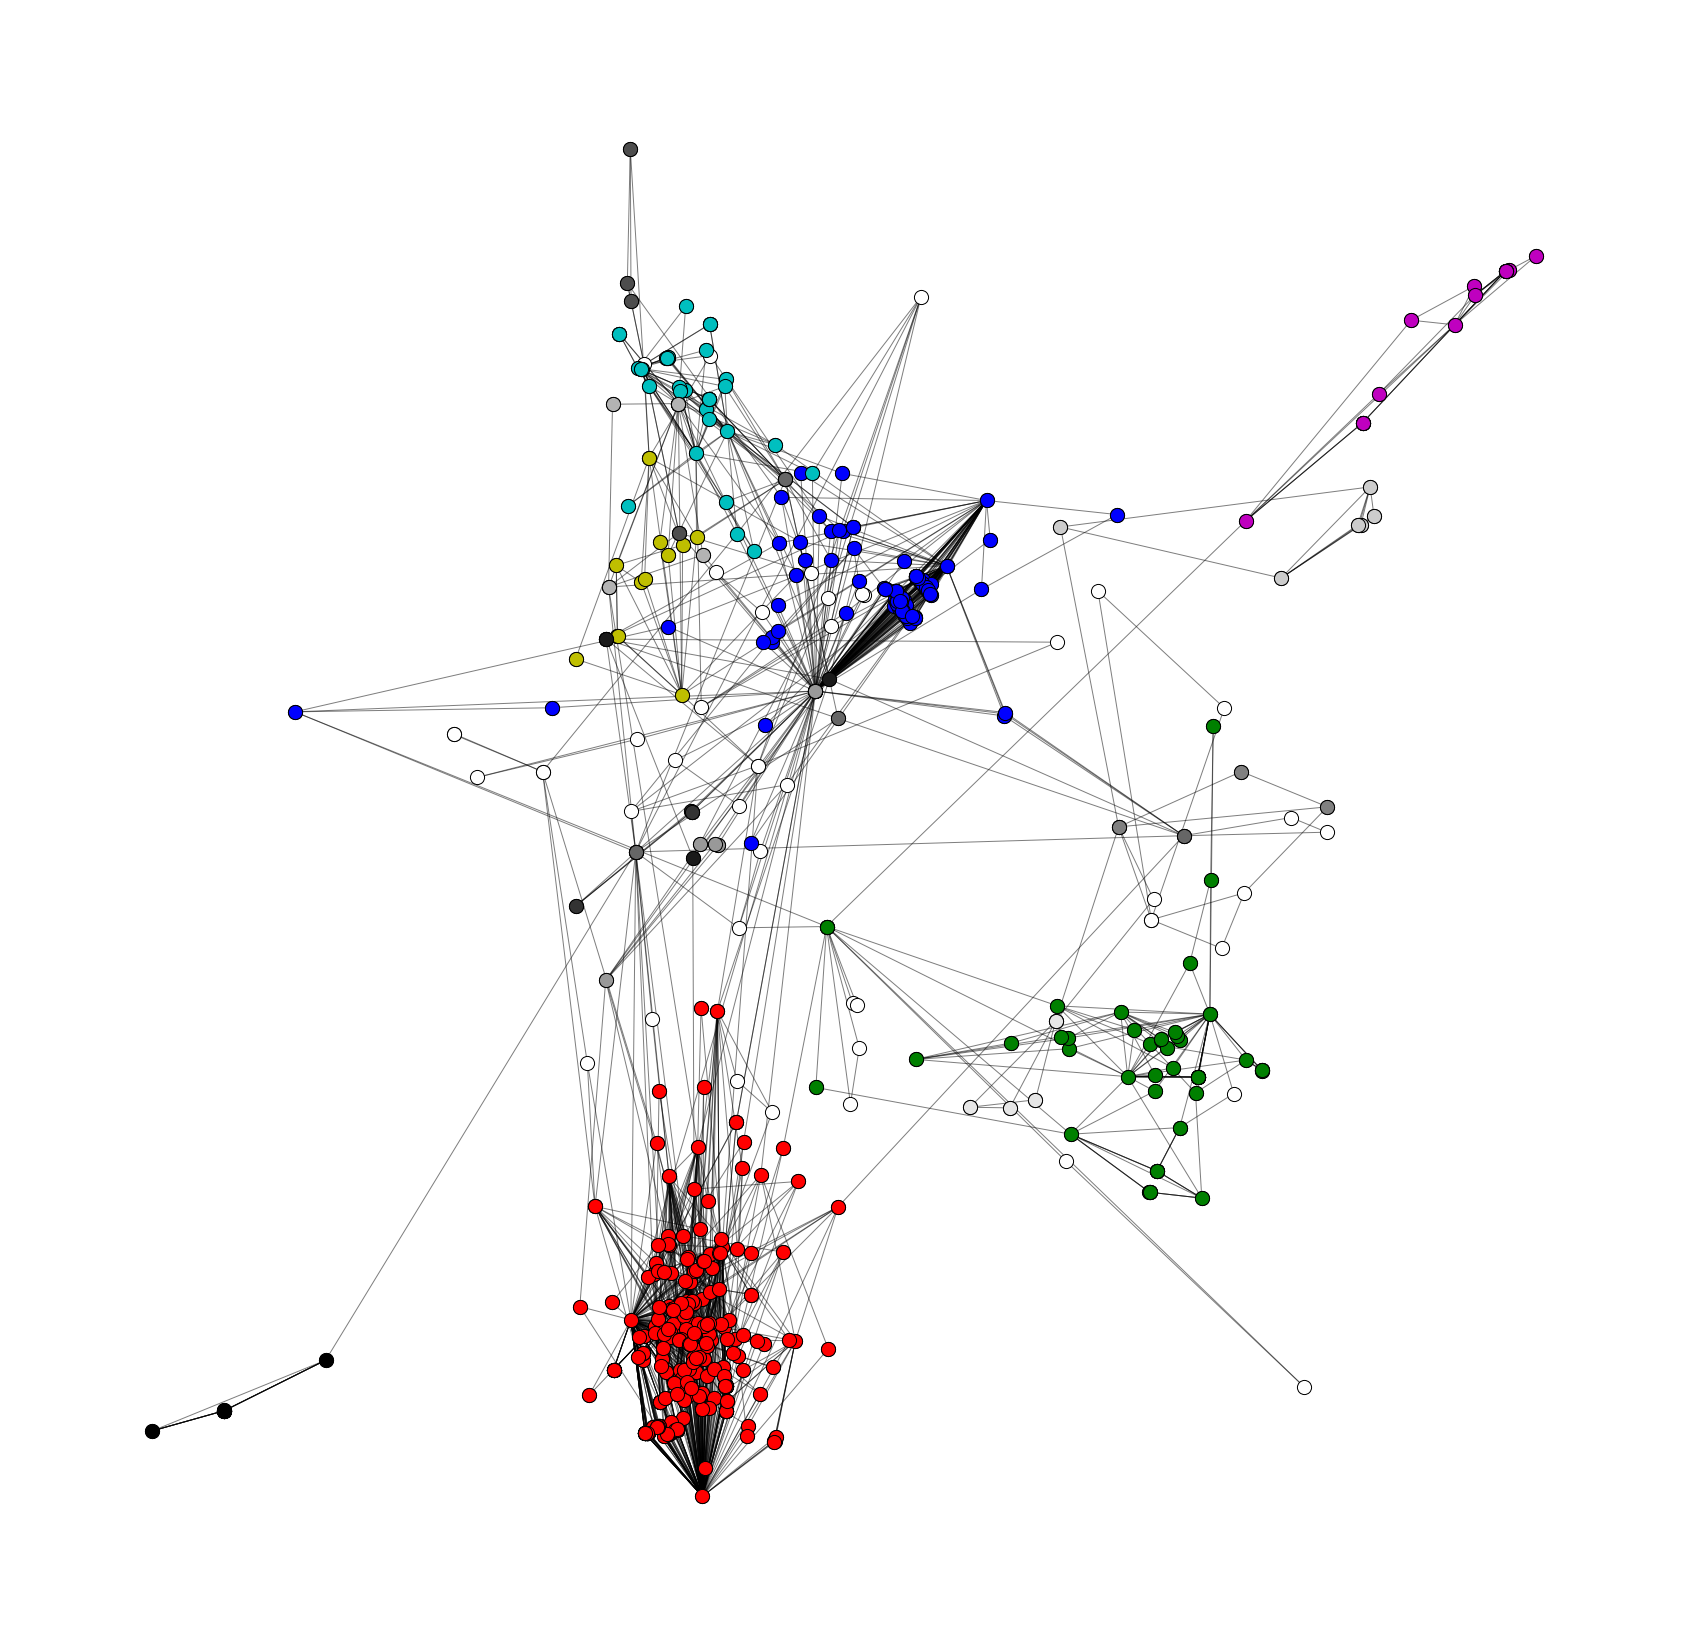

In [250]:
viz.plot_network_clusters(G, k_clique, pos, figsize=(30, 30), plot_labels=False)

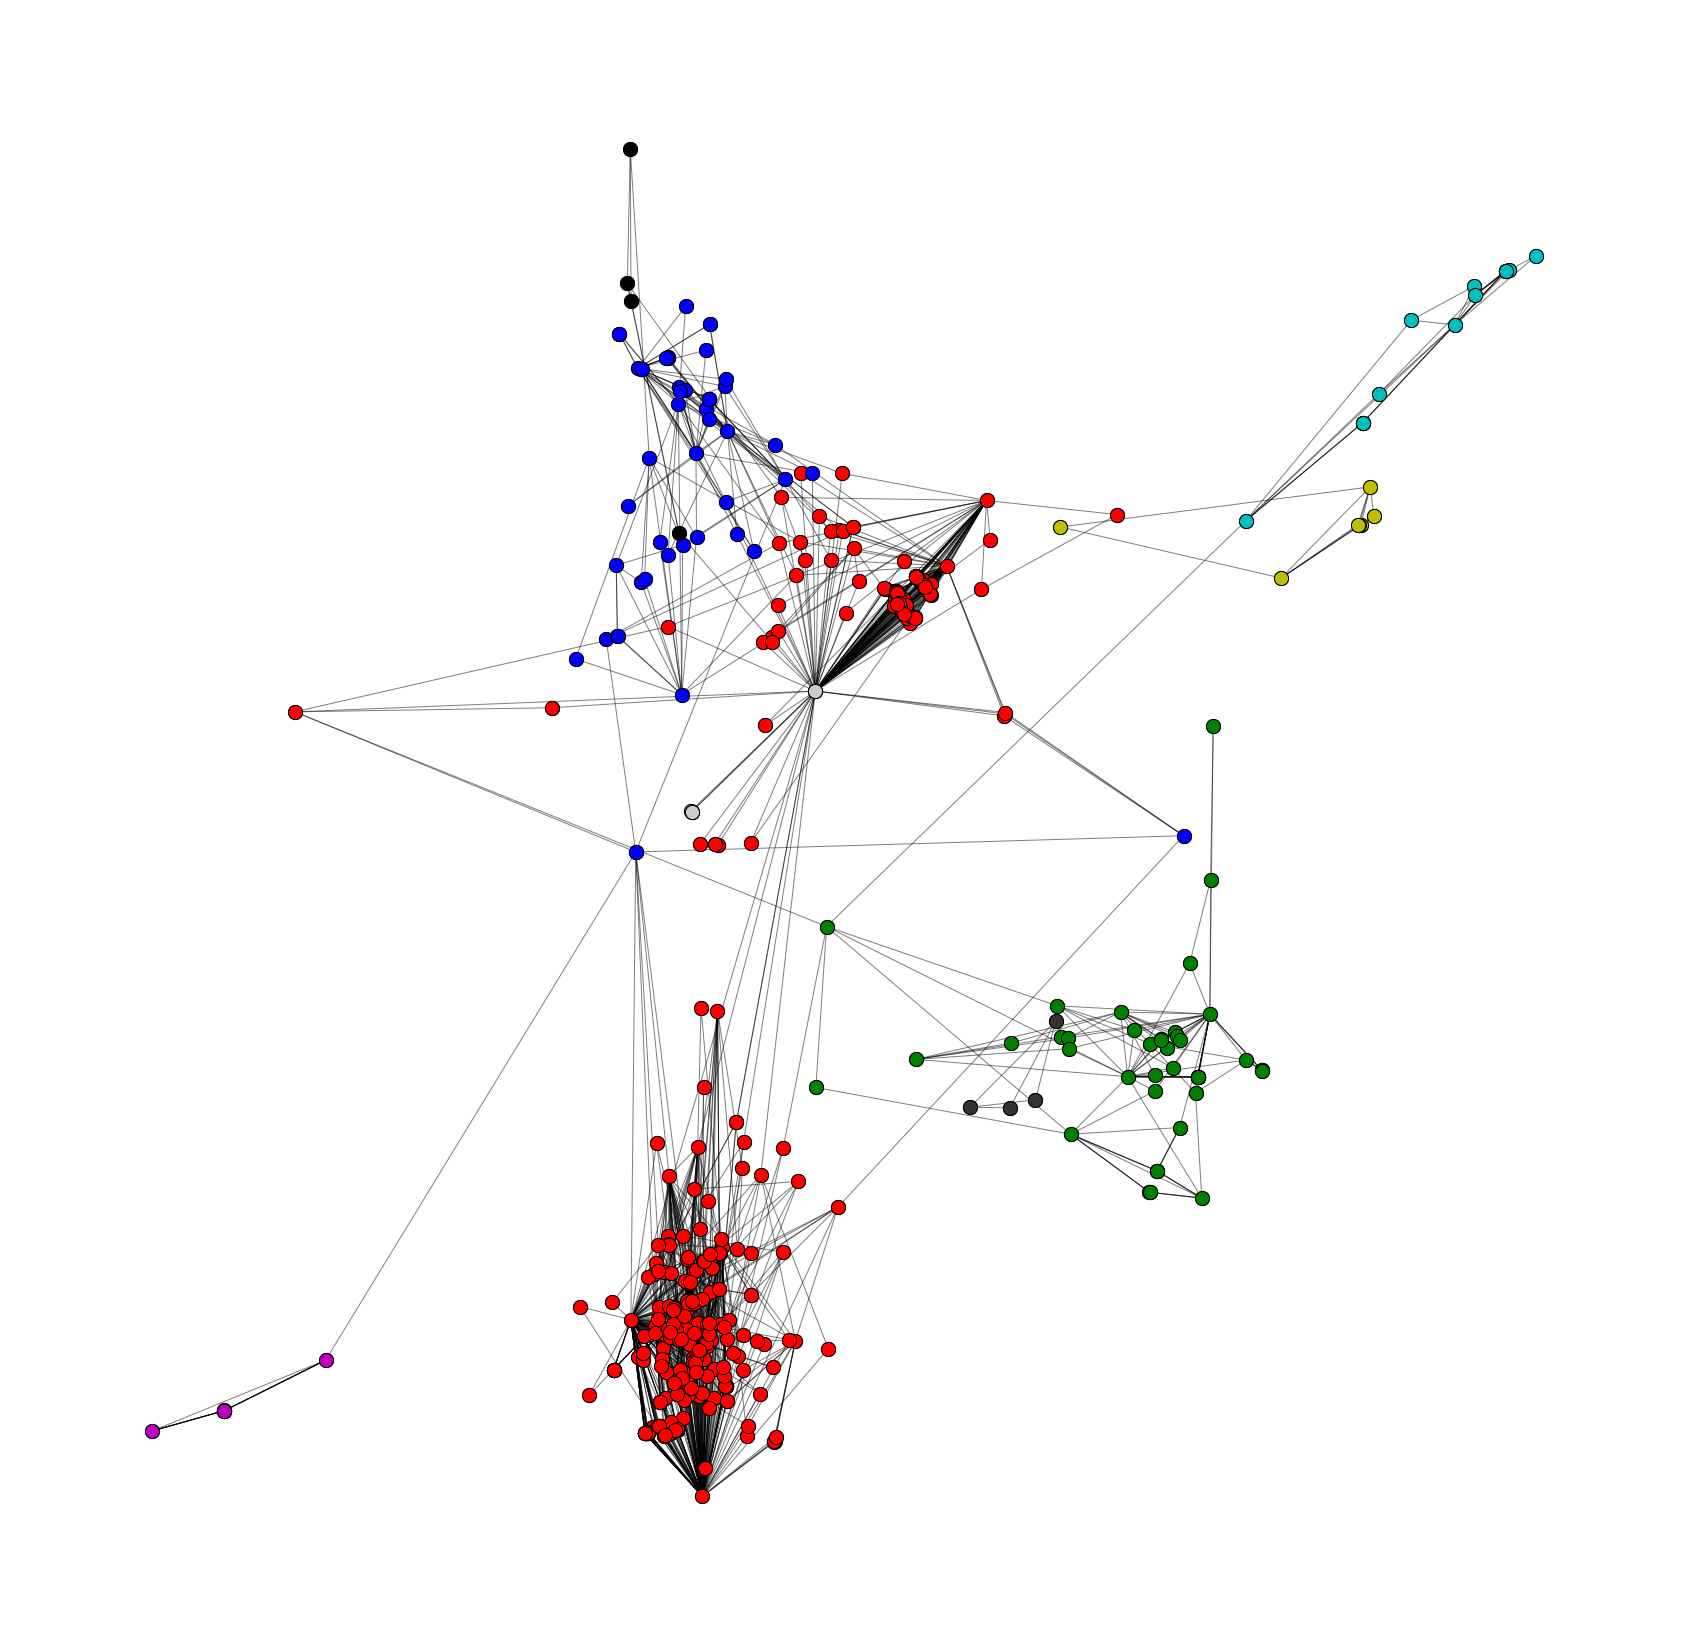

In [252]:
viz.plot_network_clusters(G, angel, pos, figsize=(30, 30), plot_labels=False)

# Community Internal Evaluation

In [85]:
method=[louvain,leiden,label_prop,k_clique,angel]
name_algo=['Louvain','Leiden','Label_prop','K_clique','Angel']
n_com=[]
size=[]
AND=[]
IED=[]
mod=[]
cond=[]
type_results=['MIN','MAX','SCORE', 'STD']
for algo in method:
    n_com.append(len(algo.communities))
    size.append(evaluation.size(G,algo, summary=True))
    AND.append(evaluation.average_internal_degree(G,algo, summary=True))
    IED.append(evaluation.internal_edge_density(G,algo, summary=True))
    mod.append(evaluation.newman_girvan_modularity(G,algo, summary=True))
    cond.append(evaluation.conductance(G,algo, summary=True))

In [86]:
mod

[FitnessResult(min=None, max=None, score=0.838429530050277, std=None),
 FitnessResult(min=None, max=None, score=0.8446222325097318, std=None),
 FitnessResult(min=None, max=None, score=0.7933294035598925, std=None),
 FitnessResult(min=None, max=None, score=0.018454263731805306, std=None),
 FitnessResult(min=None, max=None, score=0.001744538326580324, std=None)]

In [87]:
algo=[]
freq_com=[]
size_com=[]
fit_and=[]
fit_ied=[]
fit_mod=[]
fit_cond=[]
for i in range(len(name_algo)):
    algo.append(name_algo[i])
    freq_com.append(n_com[i])
    size_com.append([size[i][2],size[i][3]])
    fit_and.append([AND[i][2],AND[i][3]])
    fit_ied.append([IED[i][2],IED[i][3]])
    fit_mod.append(mod[i][2])
    fit_cond.append([cond[i][2],cond[i][3]])
tab=pd.DataFrame({'': algo,
                 'freq': freq_com,
                  'size':size_com,
                 'Average Node Degree': fit_and,
                 # 'Internal Edge Density':fit_ied,
                 'Modularity':fit_mod,
                  'Conductance':fit_cond})

tab=tab.set_index('')
tab

freq                                      size  \
                                                             
Louvain       99  [102.86868686868686, 219.04967595191582]   
Leiden        52  [195.84615384615384, 277.27418980381304]   
Label_prop   360   [28.288888888888888, 138.1676312346262]   
K_clique      39   [16.076923076923077, 46.93060048973822]   
Angel         10                 [52.7, 106.3231395322768]   

                                  Average Node Degree  Modularity  \
                                                                    
Louvain      [1.9155704865152965, 0.2063117421850125]    0.838430   
Leiden         [2.00263491021574, 0.2464675363206658]    0.844622   
Label_prop  [1.5424331463968877, 0.36445439729172213]    0.793329   
K_clique      [2.533371128561764, 0.9416330925782235]    0.018454   
Angel        [3.1047277432712215, 1.5320773811711164]    0.001745   

                                            Conductance  
                                                         
Louvain      [0.13090857526840172, 0.08375713154953611]  
Leiden      [0.08915655767981627, 0.052117669548854884]  
Label_prop    [0.25271839126824663, 0.1546307052934704]  
K_clique      [0.8860798530201132, 0.13878097026947211]  
Angel          [0.7523239094418057, 0.1890750395537248]

### Community fitness/comparison visualization

<Figure size 5760x5760 with 0 Axes>

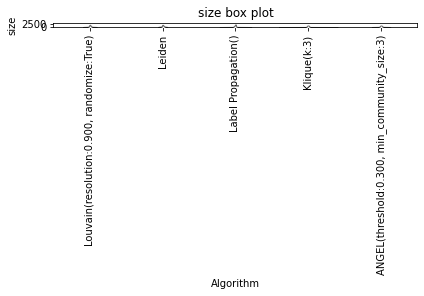

<Figure size 5760x5760 with 0 Axes>

In [45]:
viz.plot_com_stat([louvain,leiden, label_prop,k_clique, angel], evaluation.size)
plt.title('size box plot')
plt.ylim([-100,3000])
plt.figure(figsize=(80,80))


<AxesSubplot:xlabel='Algorithm', ylabel='average_internal_degree'>

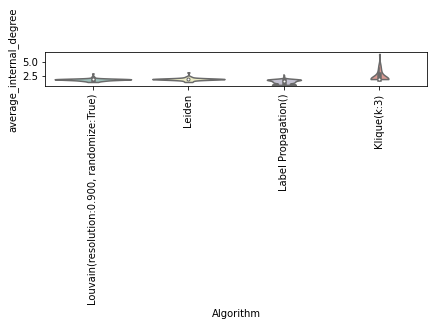

In [47]:
viz.plot_com_stat([louvain,leiden, label_prop, k_clique], evaluation.average_internal_degree)

<AxesSubplot:xlabel='Algorithm', ylabel='internal_edge_density'>

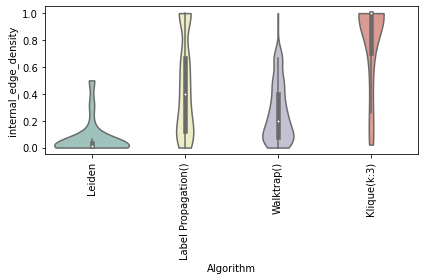

In [243]:
viz.plot_com_stat([louvain, label_prop, walktrap, k_clique], evaluation.internal_edge_density)

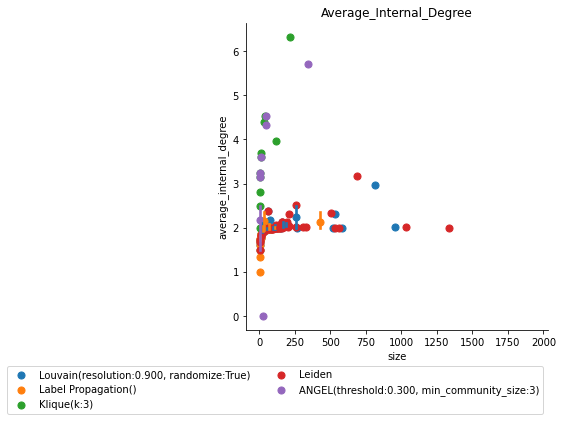

In [57]:
ax=viz.plot_com_properties_relation([louvain, label_prop, k_clique, leiden, angel], evaluation.size, evaluation.average_internal_degree) 
plt.title('Average_Internal_Degree')
plt.legend(bbox_to_anchor =(1, -0.10), ncol = 2)

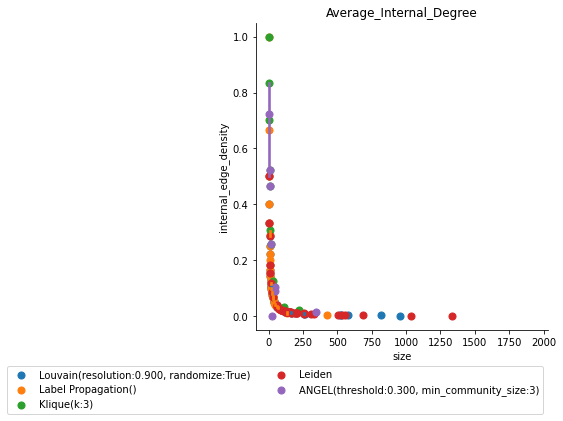

In [58]:
viz.plot_com_properties_relation([louvain, label_prop,k_clique,leiden, angel], evaluation.size, evaluation.internal_edge_density)
plt.title('Average_Internal_Degree')
plt.legend(bbox_to_anchor =(1, -0.10), ncol = 2)

# Partition Comparison

### NMI

In [41]:
evaluation.normalized_mutual_information(louvain, label_prop)

MatchingResult(score=0.7934684781254939, std=None)

In [42]:
#evaluation.normalized_mutual_information(louvain, walktrap)

In [43]:
#evaluation.normalized_mutual_information(label_prop, walktrap)

In [44]:
#evaluation.normalized_mutual_information(eig, walktrap)

In [49]:
evaluation.normalized_mutual_information(leiden, louvain)

MatchingResult(score=0.9266567112282205, std=None)

In [50]:
evaluation.normalized_mutual_information(leiden, label_prop)

MatchingResult(score=0.7984728022570619, std=None)

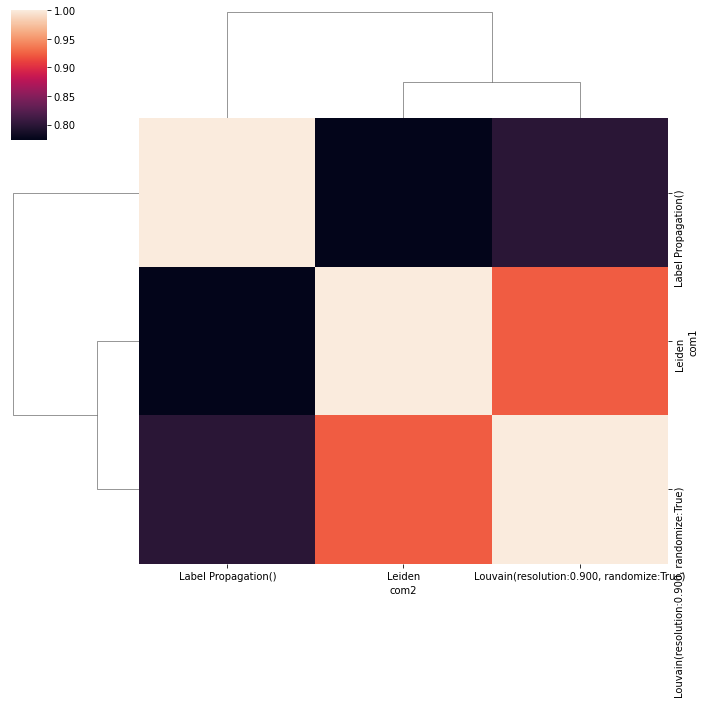

In [48]:
viz.plot_sim_matrix([louvain, label_prop, leiden],evaluation.adjusted_mutual_information)

### NF1

In [48]:
evaluation.nf1(label_prop,louvain)

MatchingResult(score=0.022813734567901235, std=None)

In [49]:
evaluation.nf1(label_prop,angel)

MatchingResult(score=0.0014960167714884696, std=None)

In [50]:
evaluation.nf1(label_prop,k_clique)

MatchingResult(score=0.0115208467359005, std=None)

In [51]:
evaluation.nf1(louvain,angel)

MatchingResult(score=0.00905277973258269, std=None)

In [52]:
evaluation.nf1(louvain,k_clique)

MatchingResult(score=0.030208748780177343, std=None)

In [53]:
evaluation.nf1(k_clique,angel)

MatchingResult(score=0.14698224852071007, std=None)

In [51]:
evaluation.nf1(label_prop, leiden)

MatchingResult(score=0.02545833333333333, std=None)

In [52]:
evaluation.nf1(louvain,leiden)

MatchingResult(score=0.23543971180334816, std=None)

In [53]:
evaluation.nf1(k_clique, leiden)

MatchingResult(score=0.019207834503004447, std=None)

In [54]:
evaluation.nf1(angel, leiden)

MatchingResult(score=0.022119230769230766, std=None)

# Ground Truth (External) evaluation

In [59]:
from cdlib import NodeClustering
from networkx.generators.community import LFR_benchmark_graph

g1 = LFR_benchmark_graph(1000, 3, 1.5, 0.5, min_community=20, average_degree=5)
g2 = LFR_benchmark_graph(1000, 3, 1.5, 0.6, min_community=20, average_degree=5)
g3 = LFR_benchmark_graph(1000, 3, 1.5, 0.7, min_community=20, average_degree=5)

names = ["g1", "g2", "g3"]
graphs = [g1, g2, g3]
references = []

<AxesSubplot:xlabel='graph', ylabel='score'>

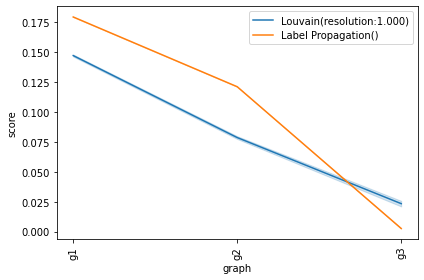

In [63]:
# building the NodeClustering ground truth for the graphs
for g in graphs:
    ground_truth = NodeClustering(communities={frozenset(g.nodes[v]['community']) for v in g}, graph=g, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.louvain, algorithms.label_propagation]
# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

<AxesSubplot:xlabel='graph', ylabel='score'>

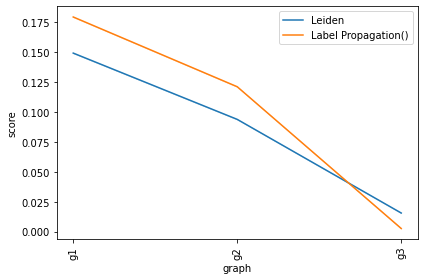

In [61]:
# building the NodeClustering ground truth for the graphs
for g in graphs:
    ground_truth = NodeClustering(communities={frozenset(g.nodes[v]['community']) for v in g}, graph=g, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.leiden, algorithms.label_propagation]
# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

<AxesSubplot:xlabel='graph', ylabel='score'>

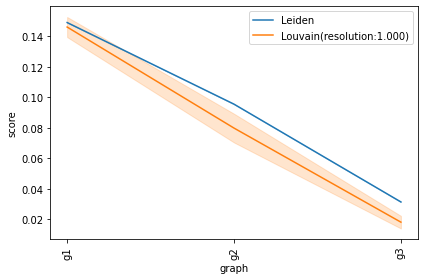

In [62]:
# building the NodeClustering ground truth for the graphs
for g in graphs:
    ground_truth = NodeClustering(communities={frozenset(g.nodes[v]['community']) for v in g}, graph=g, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.leiden, algorithms.louvain]
# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)